# End-Semester Exam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib_for_endsem as lib

## Question 2

### Helper Functions

In [4]:
def legendre_poly(x, order):
    if order == 0: return 1
    elif order == 1: return x
    elif order == 2: return (3*(x**2) - 1) / 2
    elif order == 3: return (5*(x**3) - 3*x) / 2
    elif order == 4: return (35*(x**4) - 30*(x**2) + 3) / 8
    elif order == 5: return (63*(x**5) - 70*(x**3) + 15*x) / 8
    elif order == 6: return (231*(x**6) - 315*(x**4) + 105*(x**2) - 5) / 16





def legendre_fit(X, Y, d = 3):
    n = len(X)
    p = d + 1
    A = np.zeros((p, p))
    b = np.zeros(p)

    for i in range(p):
        for j in range(p):
            sum = 0
            for k in range(n):
                sum += legendre_poly(X[k], j) * legendre_poly(X[k], i)
            A[i, j] = sum

    for i in range(p):
        sum = 0
        for k in range(n):
            sum += legendre_poly(X[k], i) * Y[k]
        b[i] = sum

    x = lib.solvex_lu(A, b)
    return x

### Main Code

The coefficients obtained in the legendre functions basis is : [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697
 -0.01238456]


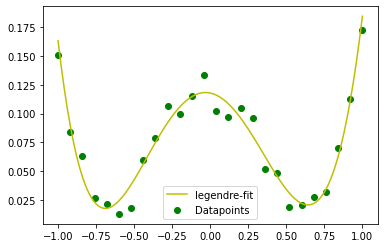

In [18]:
f = open('esem4fit.txt', 'r')
data = np.genfromtxt(f, delimiter='')
f.close()

X = data.T[0]
Y = data.T[1]

order = 6

coeff = legendre_fit(X, Y, order)

c_0, c_1, c_2, c_3 = coeff[0], coeff[1], coeff[2], coeff[3]

print("The coefficients obtained in the legendre functions basis is : {}".format(coeff))

x = np.linspace(-1, 1, 100)
y = 0
for i in range(order):
    y += coeff[i] * legendre_poly(x , i)

plt.scatter(X, Y, c = 'g', label="Datapoints")
plt.plot(x, y, "y", label="legendre-fit")

plt.legend()
plt.show()

## Question 4

### Helper functions

### Main Code

In [20]:
# The integrand - change as required
def func(x):
	return 1/np.sqrt(x**2 + 1)

for i in range(4,7):
    order = i
    [Ws,xs,err]=lib.GaussLegendreWeights(order)
    if err==0:
        print("Order    : ", order)
        print("Roots    : ", xs)
        print("Weights  : ", Ws)
    else:
        print("Roots/Weights evaluation failed")
 
    # Integrating the function
    [ans,err]=lib.GaussLegendreQuadrature(func , order, -1,1)
    if err==0:
        print( "Integral : ", ans)
    else:
        print("Integral evaluation failed")


Order    :  4
Roots    :  [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights  :  [0.34785485 0.65214515 0.65214515 0.34785485]
Integral :  1.762054180371305
Order    :  5
Roots    :  [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights  :  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
Integral :  1.7628552960514048
Order    :  6
Roots    :  [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
Weights  :  [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]
Integral :  1.762730050077202
